# Analyse Exploratoire des Données (EDA) - Prix des Loyers aux USA

**Projet**: Examen Final Python - Data Science
**Auteurs**: Adam Beloucif et Emilien MORICE

## Problématique Business
Le but de ce projet est d'analyser les annonces immobilières afin de comprendre les facteurs qui influencent le prix des loyers aux États-Unis, puis de concevoir un modèle de Machine Learning capable d'estimer ce prix pour de nouveaux biens.

### Objectifs de cette étape :
1. Explorer le jeu de données `apartments_for_rent_classified_10K.csv`.
2. Gérer les valeurs manquantes et aberrantes.
3. Étudier la distribution de la variable cible (`price`).
4. Identifier les corrélations entre les variables explicatives et le prix.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Configuration visuelle globale
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)


## 1. Chargement et Aperçu des données


In [2]:
# Lecture du dataset
# NB: Le separateur est un point-virgule et l'encodage est cp1252 d'après notre analyse préliminaire.
df = pd.read_csv('apartments_for_rent_classified_10K.csv', sep=';', encoding='cp1252')

print(f"Dimensions du dataset : {df.shape}")
display(df.head())


Dimensions du dataset : (10000, 22)


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


## 2. Structure et Statistiques Descriptives


In [3]:
# Informations générales
display(df.info())

# Statistiques descriptives
display(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

None

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


## 3. Analyse des Valeurs Manquantes


,Total Manquants,Pourcentage (%)
pets_allowed,4163,41.63
amenities,3549,35.49
address,3327,33.27
state,77,0.77
cityname,77,0.77
bathrooms,34,0.34
latitude,10,0.10
longitude,10,0.10
bedrooms,7,0.07


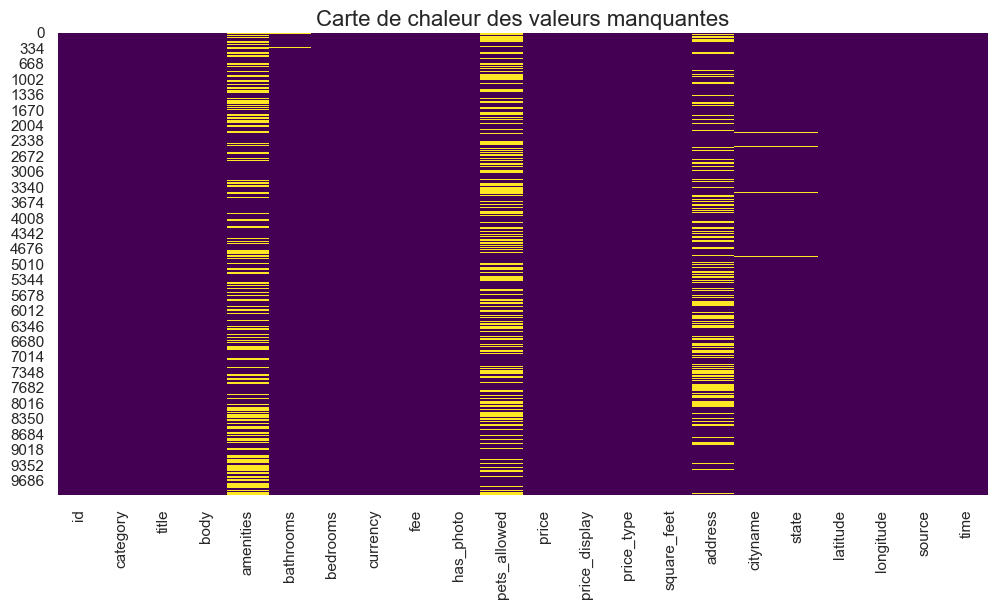

In [4]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Total Manquants': missing_values, 'Pourcentage (%)': missing_percent})
display(missing_data[missing_data['Total Manquants'] > 0].sort_values(by='Pourcentage (%)', ascending=False))

# Visualisation des valeurs manquantes
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Carte de chaleur des valeurs manquantes', fontsize=16)
plt.show()


## 4. Analyse de la Variable Cible (Price)


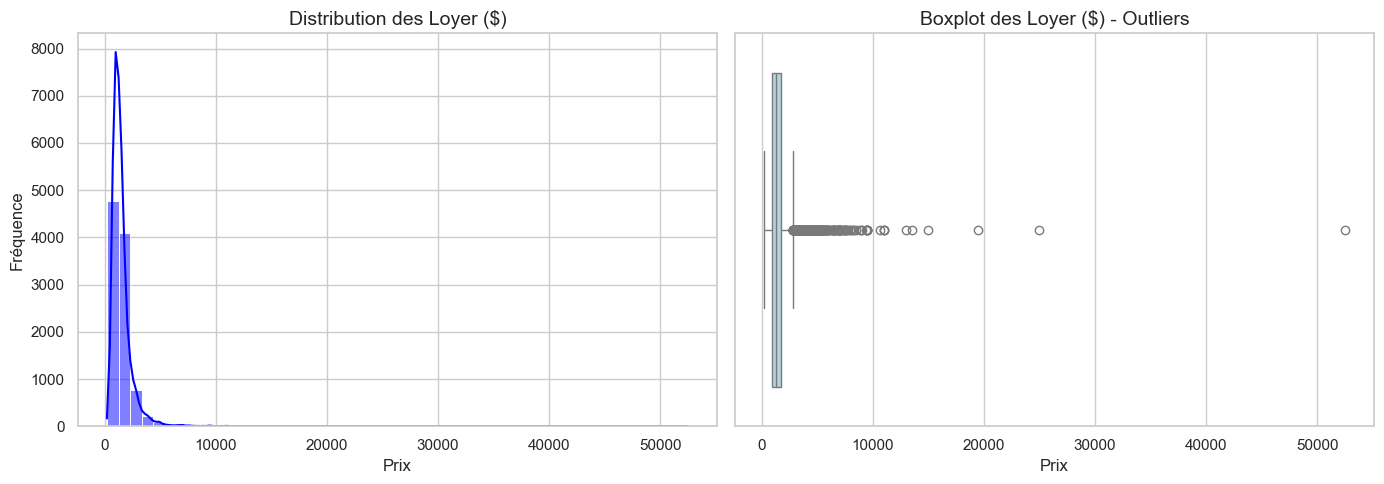

Skewness (Asymétrie) : 14.367517151261525
Kurtosis (Aplatissement) : 547.1944918099513


In [5]:
plt.figure(figsize=(14, 5))

# Histogramme du prix
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.title('Distribution des Loyer ($)', fontsize=14)
plt.xlabel('Prix')
plt.ylabel('Fréquence')

# Boîte à moustaches (Boxplot) pour identifier les outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'], color='lightblue')
plt.title('Boxplot des Loyer ($) - Outliers', fontsize=14)
plt.xlabel('Prix')

plt.tight_layout()
plt.show()

print("Skewness (Asymétrie) :", df['price'].skew())
print("Kurtosis (Aplatissement) :", df['price'].kurt())


## 5. Analyse Bivariée & Corrélations


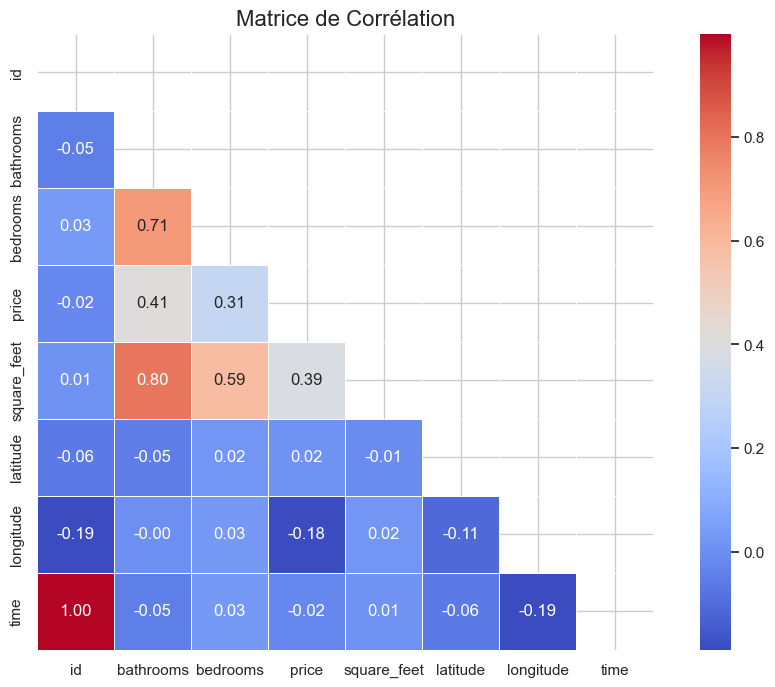

In [6]:
# Filtrage des variables numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_cols].corr()

# Masque pour la matrice triangulaire supérieure
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Matrice de Corrélation', fontsize=16)
plt.show()


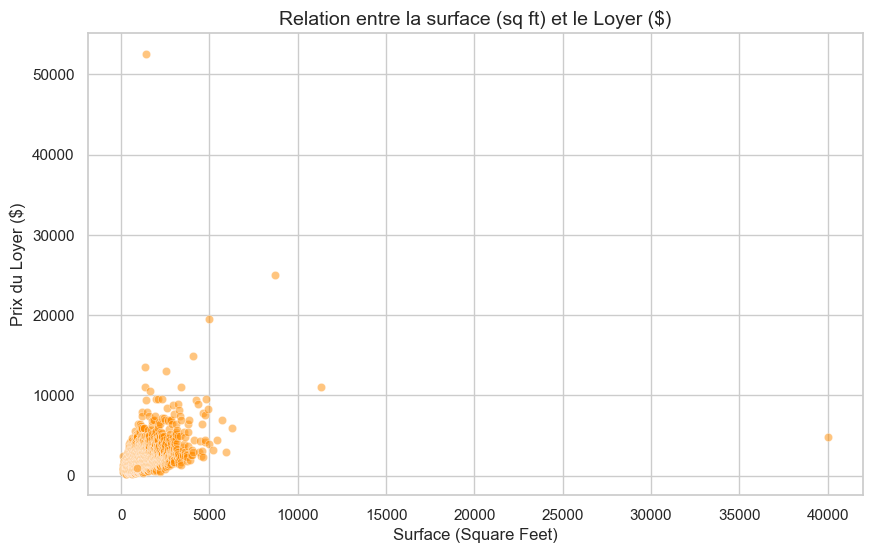

In [7]:
# Relation entre la surface (square_feet) et le prix
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='square_feet', y='price', alpha=0.5, color='darkorange')
plt.title('Relation entre la surface (sq ft) et le Loyer ($)', fontsize=14)
plt.xlabel('Surface (Square Feet)')
plt.ylabel('Prix du Loyer ($)')
plt.show()


## 6. Conclusions pour la Modélisation

1. **Valeurs manquantes** : Les colonnes avec un très fort taux de valeurs manquantes (ex: `address`, `amenities`) devront être ignorées ou traitées spécifiquement.
2. **Outliers** : La distribution du `price` est asymétrique avec des valeurs extrêmes à droite. Un filtrage (ex: isoler les loyers entre 200$ et 10,000$) ou une transformation logarithmique est nécessaire. De même pour `square_feet`.
3. **Features pertinentes** : Les variables `square_feet`, `bedrooms`, `bathrooms`, `latitude` et `longitude` montrent le plus fort potentiel explicatif ou logique métier. Les variables textuelles (`title`, `body`) ne seront pas utilisées pour le modèle de base, bien qu'elles pourraient être utiles avec du NLP.
4. **Catégorielles** : `pets_allowed` ou `state` peuvent être encodées.
